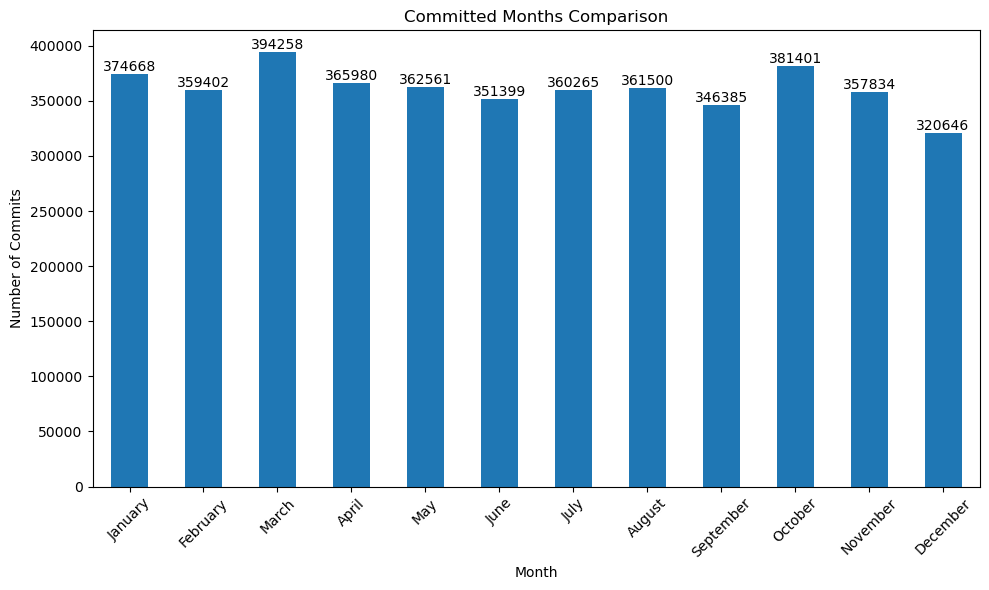

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Exploratory Data Analysis (EDA) - Bar Chart Committed Months Comparison
df = pd.read_csv("full.csv")

# Extract Month Name
df['parsed_date'] = df['date'].apply(lambda x: datetime.strptime(x.rsplit(' ', 1)[0], '%a %b %d %H:%M:%S %Y'))
df['month_name'] = df['parsed_date'].dt.strftime('%B')

# Count Occurrences
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

month_counts = df['month_name'].value_counts().reindex(month_order).fillna(0)

# Plot Bar Chart
plt.figure(figsize=(10, 6))
month_counts.plot(kind='bar')
# Add label
for i, value in enumerate(month_counts):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')
plt.title("Committed Months Comparison")
plt.xlabel("Month")
plt.ylabel("Number of Commits")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

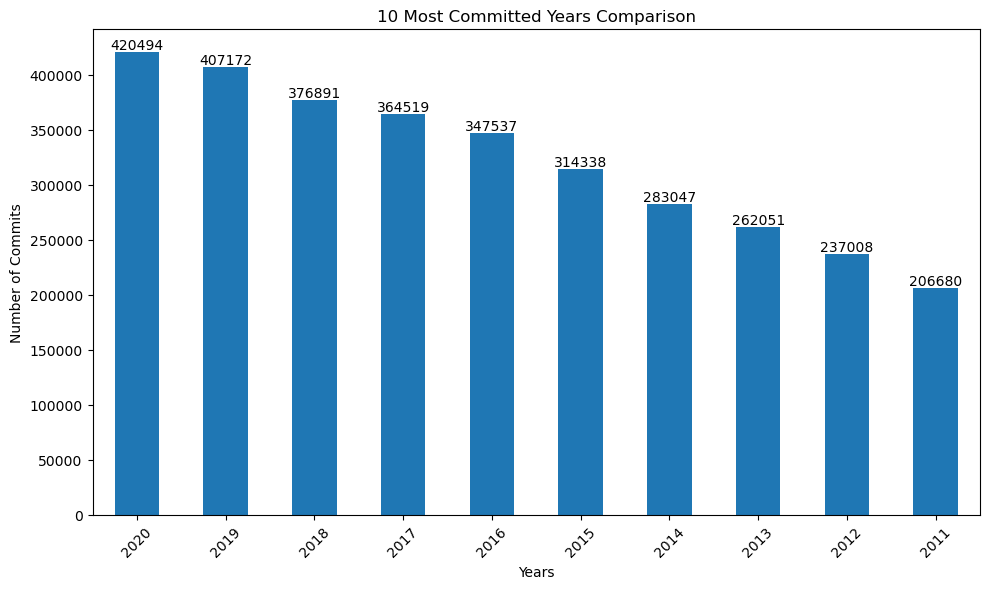

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Exploratory Data Analysis (EDA) - Bar Chart 10 Most Committed Years Comparison
df = pd.read_csv("full.csv")

# Extract Month Name
df['parsed_date'] = df['date'].apply(lambda x: datetime.strptime(x.rsplit(' ', 1)[0], '%a %b %d %H:%M:%S %Y'))
df['year'] = df['parsed_date'].dt.strftime('%Y')

years_counts = df['year'].value_counts().head(10)

# Plot Bar Chart
plt.figure(figsize=(10, 6))
years_counts.plot(kind='bar')
# Add label
for i, value in enumerate(years_counts):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')
plt.title("10 Most Committed Years Comparison")
plt.xlabel("Years")
plt.ylabel("Number of Commits")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

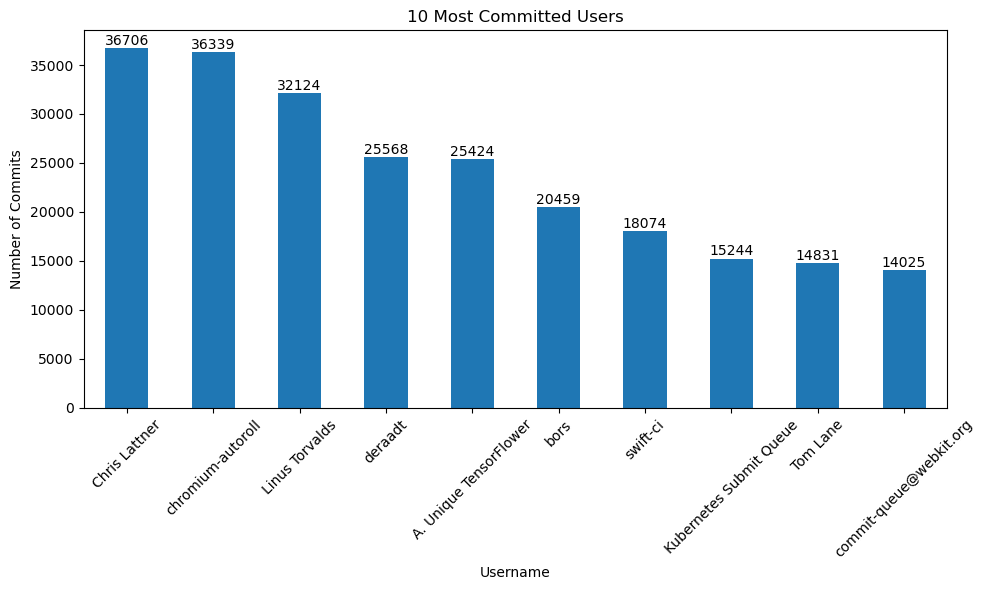

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Exploratory Data Analysis (EDA) - Bar Chart 10 Most Committed Users
df = pd.read_csv("full.csv")

# Extract Username from Author Username Email
def extract_author_name(author):
    if pd.isnull(author):
        return None
    match = re.match(r'^(.*?)\s*<', author)
    return match.group(1).strip() if match else author.strip()

df['author_name'] = df['author'].apply(extract_author_name)

# Group by author_name and count commits
author_commit_counts = df['author_name'].value_counts().head(10)

# Plot Bar Chart
plt.figure(figsize=(10, 6))
author_commit_counts.plot(kind='bar')
# Add label
for i, value in enumerate(author_commit_counts):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')
plt.title("10 Most Committed Users")
plt.xlabel("Username")
plt.ylabel("Number of Commits")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()